# GreenWay

## Route planning application

In [1]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Load the data.
with open('settlements-2015.json') as f:
    data = json.load(f)
data['features'][0]

# Convert the data to a GeoDataFrame.
gdf_dwellings = gpd.GeoDataFrame.from_features(data)

# Set the CRS to Irish National Grid (EPSG:2157 for ITM)
gdf_dwellings.crs = "EPSG:29903"

# Convert the GeoDataFrame to WGS84 (EPSG:4326)
gdf_dwellings = gdf_dwellings.to_crs("EPSG:4326")
gdf_dwellings.head()

,geometry,Code,Name,Band,DT_20MIN,DT_30MIN,UR_ex,OccHH_ex,UR_ap,OccHH_ap
0,"MULTIPOLYGON (((-6.93352 54.67246, -6.93295 54...",N11000199,DUNNAMORE,H,Y,Y,119,35,119,35
1,"POLYGON ((-5.74740 54.60590, -5.74738 54.60577...",N11000015,BALLYBARNES,H,Y,Y,242,101,243,102
2,"POLYGON ((-6.30664 55.06347, -6.30661 55.06361...",N11000121,LOUGHGUILE,H,N,Y,396,128,396,128
3,"POLYGON ((-5.94126 54.22845, -5.94122 54.22846...",N11000265,BRYANSFORD,H,N,Y,306,114,309,115
4,"POLYGON ((-7.47491 54.78093, -7.47493 54.78098...",N11000636,SION MILLS,G,Y,Y,1903,769,1907,770


In [3]:
import contextily as ctx

# List of all map tile providers.
providers = ctx.providers.keys()
print(list(providers))

['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'BaseMapDE', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'TopPlusOpen', 'Gaode', 'Strava', 'OrdnanceSurvey']


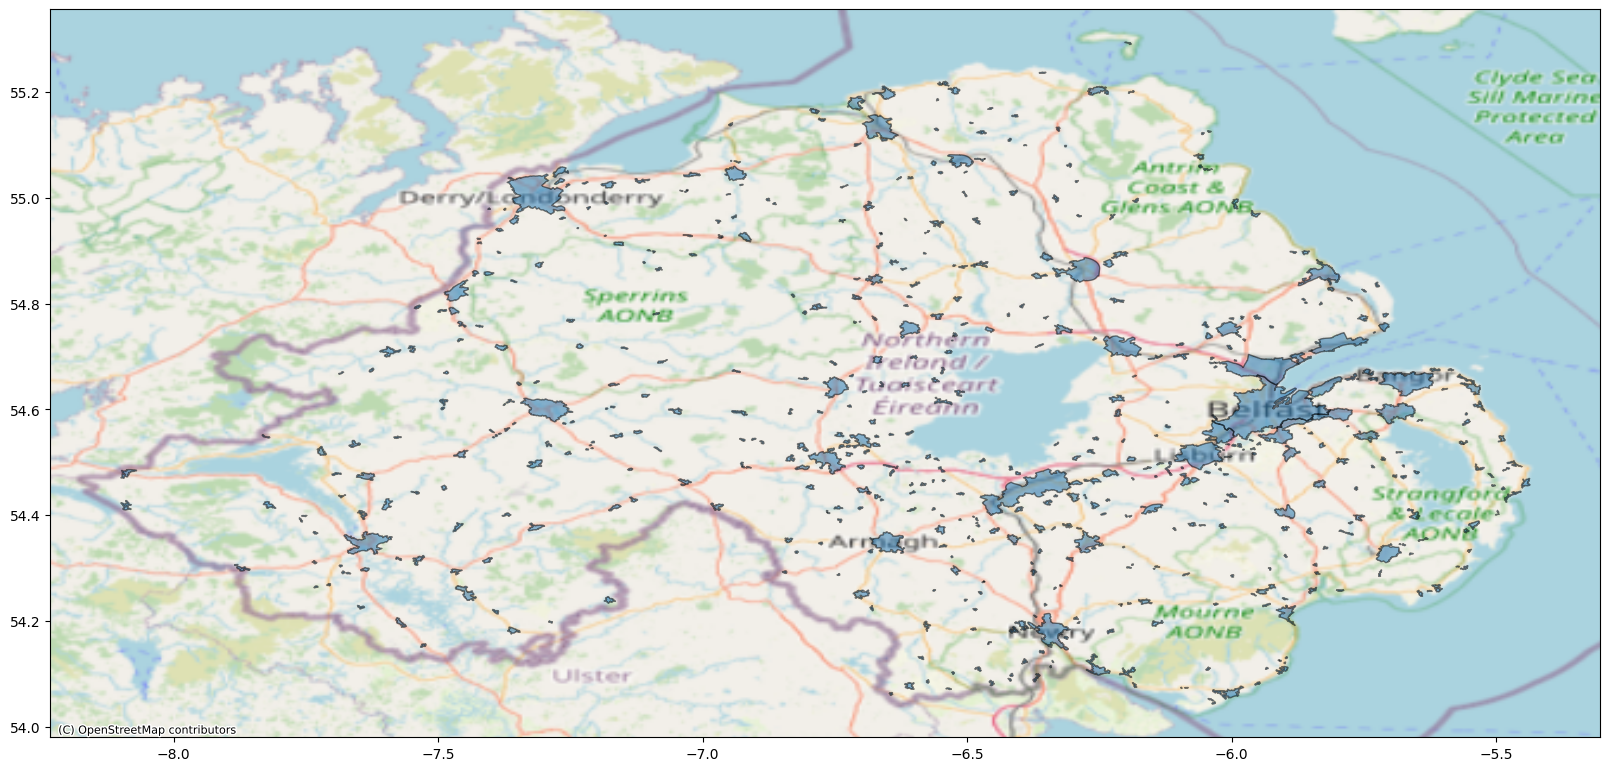

In [4]:
# Plot and add a basemap.
fig_size = (20, 20)
fig, ax = plt.subplots(figsize=fig_size)
ax = gdf_dwellings.plot(ax=ax, figsize=fig_size, alpha=0.5, edgecolor='k')

# Add a basemap.
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, 
                crs=gdf_dwellings.crs.to_string())
plt.show()

In [5]:
# Import the special area GeoJSON file.
with open('special-area.geojson') as f:
    special_data = json.load(f)
special_data['features'][0]
    
# Overlay the special area on the map.
gdf_special = gpd.GeoDataFrame.from_features(special_data)
gdf_special.crs = "EPSG:4326"
gdf_special = gdf_special.to_crs(gdf_dwellings.crs)
gdf_special.head()

,geometry,OBJECTID,REFERENCE,NAME,DEC_AREA,GRID_REF,COUNTY,CLASSIFIED,MAP_SCALE,Latitude,Longitude,Status,Shape_STAr,Shape_STLe,Hyperlink,Shape_ST_1,Shape_ST_2
0,"MULTIPOLYGON (((-5.90028 54.65971, -5.90030 54...",1,UK9020101,Belfast Lough,432.14,J353783,"Antrim, Down",1998/08/05,1:10000,54 38 00 N,05 54 00 W,Classified,4.321395e+06,75061.502275,https://www.daera-ni.gov.uk/publications/speci...,4.321395e+06,75061.502275
1,"MULTIPOLYGON (((-5.75809 54.82755, -5.75827 54...",2,UK9020042,Larne Lough,395.94,J450987,Antrim,1997/03/04,1:10000,54 48 54 N,05 44 38 W,Classified,3.959434e+06,63730.313662,https://www.daera-ni.gov.uk/publications/larne...,3.959434e+06,63730.313662
2,"MULTIPOLYGON (((-6.51484 54.60474, -6.51468 54...",3,UK9020091,Lough Neagh and Lough Beg,40835.53,J030700,"Antrim, Armagh, Down, Londonderry, Tyrone",1996/04/01,1:10000,54 34 11 N,06 24 34 W,Classified,4.083553e+08,242884.713911,https://www.daera-ni.gov.uk/publications/lough...,4.083553e+08,242884.713911
3,"MULTIPOLYGON (((-8.03663 54.51292, -8.03649 54...",4,UK9020051,Pettigoe Plateau,1264.32,H010650,Fermanagh,1996/11/19,1:10000,54 32 00 N,07 59 04 W,Classified,1.264321e+07,47625.530696,https://www.daera-ni.gov.uk/publications/petti...,1.264321e+07,47625.530696
4,"MULTIPOLYGON (((-6.35332 55.24830, -6.35330 55...",5,UK9020021,Sheep Island,3.50,D049459,Antrim,1992/12/21,"1:10000, but copy of declaration map",55 14 56 N,06 21 00 W,Classified,3.495250e+04,1282.752820,https://www.daera-ni.gov.uk/publications/sheep...,3.495250e+04,1282.752820


In [6]:
# Import area of outstanding natural beauty (AONB) GeoJSON file.
with open('aonb.geojson') as f:
    aonb_data = json.load(f)
aonb_data['features'][0]

gdf_aonb = gpd.GeoDataFrame.from_features(aonb_data)
gdf_aonb.crs = "EPSG:4326"
gdf_aonb = gdf_aonb.to_crs(gdf_dwellings.crs)
gdf_aonb.head()

,geometry,Id,NAME,LEGISLATIN,DIST_COUNC,COUNTY,CALC_AREA,ID_REF,D_DEC_DATE,Area_Hecta,COMMENTS,GIS_AREA,Hyperlink,Shape_STAr,Shape_STLe
0,"MULTIPOLYGON (((-5.87484 54.15453, -5.87485 54...",0,Mourne,NCALO,"Down, Newry & Mourne",Down,57965.79,AONB2,09/12/1986,57965.787376,None,57965.787376,https://www.daera-ni.gov.uk/articles/mourne-aonb,5.796579e+08,166316.826932
1,"MULTIPOLYGON (((-5.65019 54.58959, -5.64983 54...",0,Strangford and Lecale,NCALO,"Ards, Down",Down,52503.69,AONB8,08/06/2010,52503.686735,Designation relates to the bounded area above ...,52503.686735,https://www.daera-ni.gov.uk/articles/strangfor...,5.250369e+08,208465.198119
2,"MULTIPOLYGON (((-6.43064 54.05877, -6.43088 54...",0,Ring of Gullion,NCALO,Newry & Mourne,Armagh,15328.56,AONB5,12/12/1991,15328.561025,None,15328.561025,https://www.daera-ni.gov.uk/articles/ring-gull...,1.532856e+08,74096.116716
3,"MULTIPOLYGON (((-6.64878 55.20412, -6.64874 55...",0,Causeway Coast,NCALO,"Moyle, Coleraine",Antrim,4212.96,AONB4,22/03/1989,4212.959009,None,4212.959009,https://www.daera-ni.gov.uk/articles/causeway-...,4.212959e+07,122055.448663
4,"MULTIPOLYGON (((-6.24960 55.21200, -6.24949 55...",0,Antrim Coast and Glens,NCALO,"Ballymena, Ballymoney, Larne, Moyle",Antrim,72488.65,AONB3,07/07/1988,72488.654422,None,72488.654422,https://www.daera-ni.gov.uk/articles/antrim-co...,7.248865e+08,236127.535744


/tmp/ipykernel_39067/3116023660.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_dwellings_buffer['geometry'] = gdf_dwellings.buffer(0.01)


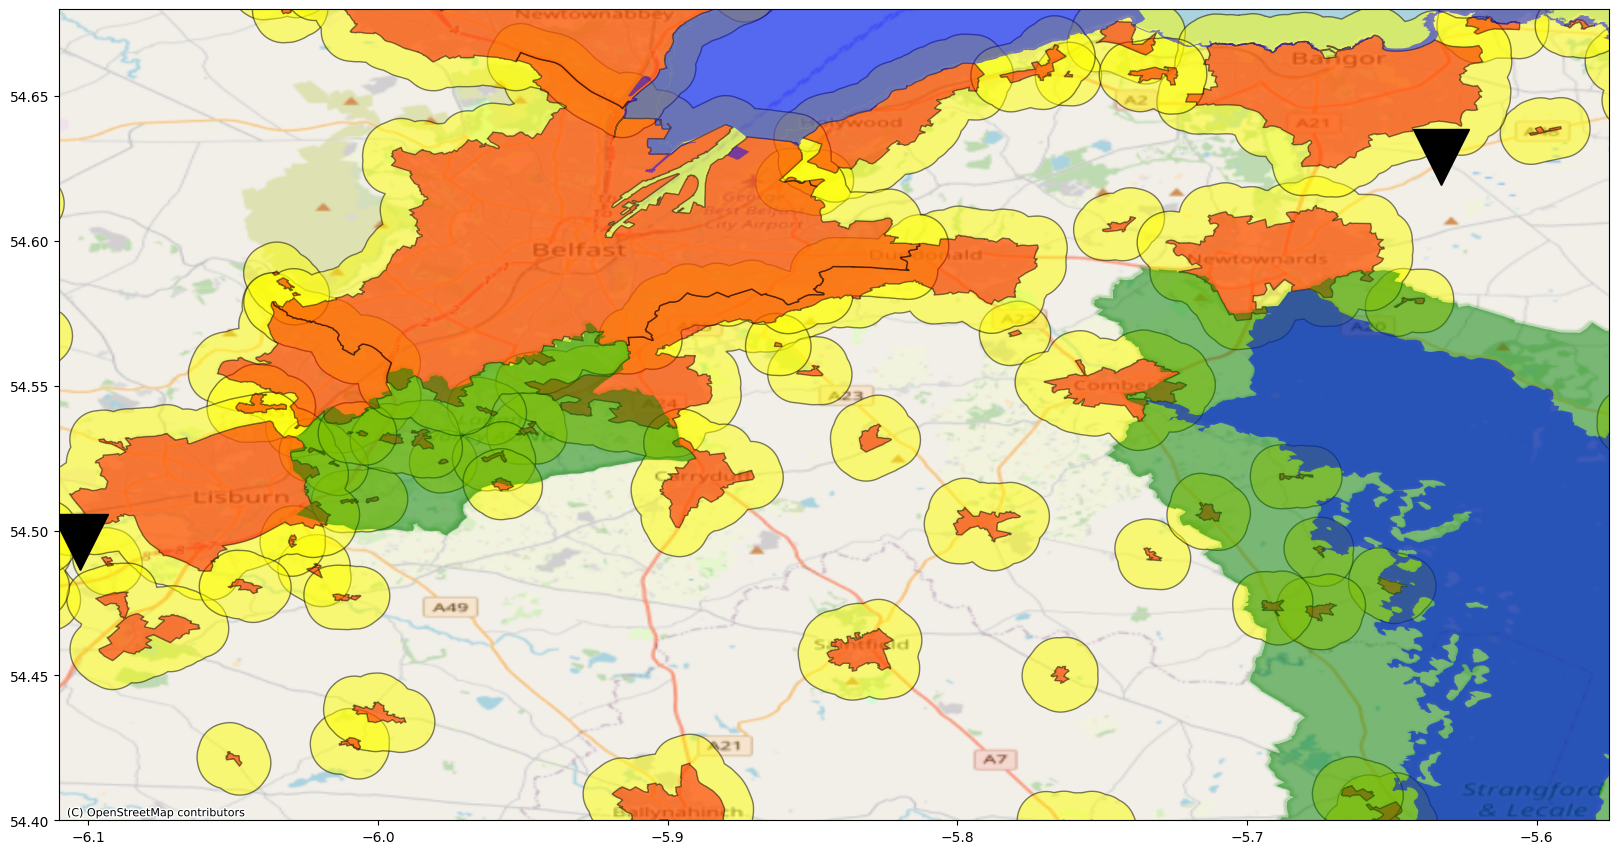

In [7]:
fig, ax = plt.subplots(figsize=fig_size)

# Create a buffer 1km around each dwelling.
gdf_dwellings_buffer = gdf_dwellings.copy()
gdf_dwellings_buffer['geometry'] = gdf_dwellings.buffer(0.01)
gdf_dwellings_buffer.plot(ax=ax, color='yellow', alpha=0.5, edgecolor='k')
gdf_dwellings.plot(ax=ax, figsize=fig_size, color='red', alpha=0.5, edgecolor='k')

# Overlay the special area and AONB.
gdf_aonb.plot(ax=ax, color="green", alpha=0.5)
gdf_special.plot(ax=ax, color="blue", alpha=0.5)

# Set area limits to show Lisburn and Ballynahinch.
xlim = (-6.11, -5.575)
ylim = (54.4, 54.68)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set points of interest.
point_a = (-6.102939073037159, 54.49593379741239) # Lisburn.
point_b = (-5.633112239234465, 54.628894627108316) # Six road ends.

# Add points of interest.
ax.plot(point_a[0], point_a[1], 'kv', markersize=40)
ax.plot(point_b[0], point_b[1], 'kv', markersize=40)

# Add base map.
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, 
                crs=gdf_dwellings.crs.to_string())
plt.show()


In [8]:
# Calculate the distance between two points.
from geopy.distance import geodesic
distance = geodesic(point_a, point_b).kilometers
print(f"The distance between the two points is {distance:.2f} km.")

The distance between the two points is 54.00 km.


In [9]:

# Assign a weight to each layer of the map.
weights = {
    'gdf_dwellings': 10,
    'gdf_dwellings_buffer': 1.5,
    'gdf_special': 5,
    'gdf_aonb': 2
}
weights = {
    'gdf_dwellings': 3,
    'gdf_dwellings_buffer': 1.2,
    'gdf_special': 3,
    'gdf_aonb': 1.3
}
max_powerline_distance = 0.5  # km

In [10]:
def get_combined_extent(*gdfs):
    """
    Calculate the combined extent from multiple GeoDataFrames.
    """
    minx, miny, maxx, maxy = float('inf'), float('inf'), float('-inf'), float('-inf')
    for gdf in gdfs:
        bounds = gdf.total_bounds
        minx, miny, maxx, maxy = min(minx, bounds[0]), min(miny, bounds[1]), max(maxx, bounds[2]), max(maxy, bounds[3])
    return minx, miny, maxx, maxy

combined_extent = get_combined_extent(gdf_dwellings, gdf_dwellings_buffer, gdf_special, gdf_aonb)

In [11]:
import rasterio
from rasterio.transform import from_bounds
from rasterio.features import rasterize

# Define function to rasterise geodataframe.
def rasterise_gdf(gdf, pixel_size, extent):
    minx, miny, maxx, maxy = extent
    width = int((maxx - minx) / pixel_size)
    height = int((maxy - miny) / pixel_size)
    out_transform = from_bounds(minx, miny, maxx, maxy, width, height)

    out_image = rasterize(
        shapes=((geom, 1) for geom in gdf.geometry),
        out_shape=(height, width),
        transform=out_transform,
        fill=-9999,
        dtype='int16'
    )
    return out_image


In [12]:
# Rasterise the GeoDataFrames.
pixel_size = 0.0001 # 0.01 km = 10 m
raster_dwellings = rasterise_gdf(gdf_dwellings,
                                 pixel_size=pixel_size,
                                 extent=combined_extent)
raster_dwellings_buffer = rasterise_gdf(gdf_dwellings_buffer,
                                        pixel_size=pixel_size,
                                        extent=combined_extent)
raster_special = rasterise_gdf(gdf_special,
                               pixel_size=pixel_size,
                               extent=combined_extent)
raster_aonb = rasterise_gdf(gdf_aonb,
                            pixel_size=pixel_size,
                            extent=combined_extent)

# Apply the weights to the rasters.
raster = (
    raster_dwellings * weights['gdf_dwellings'] +
    raster_dwellings_buffer * weights['gdf_dwellings_buffer'] +
    raster_special * weights['gdf_special'] +
    raster_aonb * weights['gdf_aonb']
)
raster_normalized = 1 + (raster - raster.min()) / (raster.max() - raster.min())



In [13]:
# Function to convert geographic coordinates to pixel coordinates
def to_pixel_coordinates(raster, xlim, ylim, lon, lat):
    # Get the raster dimensions.
    height, width = raster.shape  # Corrected the order to (height, width)
    min_lon, max_lon = xlim
    min_lat, max_lat = ylim
    
    # Calculate the size of each pixel
    pixel_size_x = (max_lon - min_lon) / width
    pixel_size_y = (max_lat - min_lat) / height
    
    # Adjust for the raster grid where y=0 is at the top edge
    x = int((lon - min_lon) / pixel_size_x)
    # Corrected the y calculation to flip the y-axis
    y = height - int((lat - min_lat) / pixel_size_y) - 1
    return x, y

In [14]:
# Convert the points of interest to pixel coordinates.
pixel_a = to_pixel_coordinates(raster_normalized, xlim, ylim, *point_a)
pixel_b = to_pixel_coordinates(raster_normalized, xlim, ylim, *point_b)
pixel_a, pixel_b

((356, 8587), (24099, 2384))

In [15]:
def geographic_to_pixel(raster, xlim, ylim, lon, lat):
    min_lon, max_lon = xlim
    min_lat, max_lat = ylim
    height, width = raster.shape

    pixel_size_x = (max_lon - min_lon) / width
    pixel_size_y = (max_lat - min_lat) / height

    x = int((lon - min_lon) / pixel_size_x)
    y = int((max_lat - lat) / pixel_size_y)  # Assuming y=0 at top, increases downward

    return x, y

# Calculate pixel coordinates for the points within the raster's extent
point_a_px, point_a_py = geographic_to_pixel(raster_normalized, xlim, ylim, *point_a)
point_b_px, point_b_py = geographic_to_pixel(raster_normalized, xlim, ylim, *point_b)
point_a_px, point_a_py, point_b_px, point_b_py

(356, 8587, 24099, 2384)

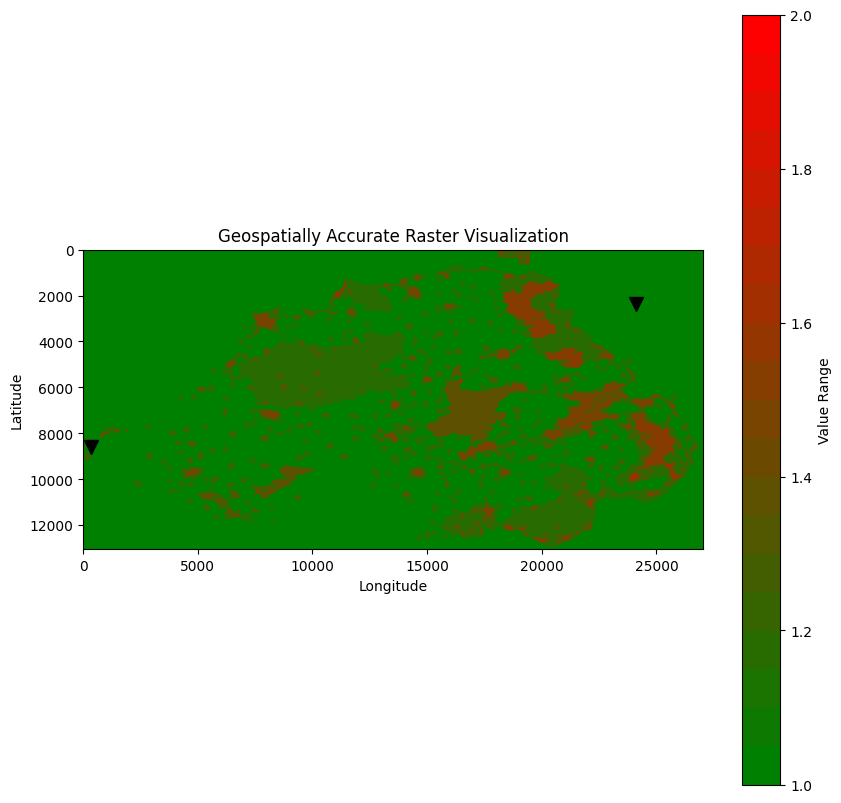

In [16]:
import rasterio.plot
from matplotlib.colors import LinearSegmentedColormap

# Define colors from low to high values
colors = ["green", "red"]  # Start with green, end with red
n_bins = 20  # Increase this for finer color transitions
cmap_name = "custom_green_red"

# Create the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

fig, ax = plt.subplots(figsize=(10, 10))
# Display the raster
im = ax.imshow(raster_normalized, cmap=cm)

# Add a colorbar to the plot
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Value Range')

# Adding titles and labels (optional)
ax.set_title('Geospatially Accurate Raster Visualization')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add the points of interest.
ax.plot(pixel_a[0], pixel_a[1], 'kv', markersize=10)
ax.plot(pixel_b[0], pixel_b[1], 'kv', markersize=10)

plt.show()

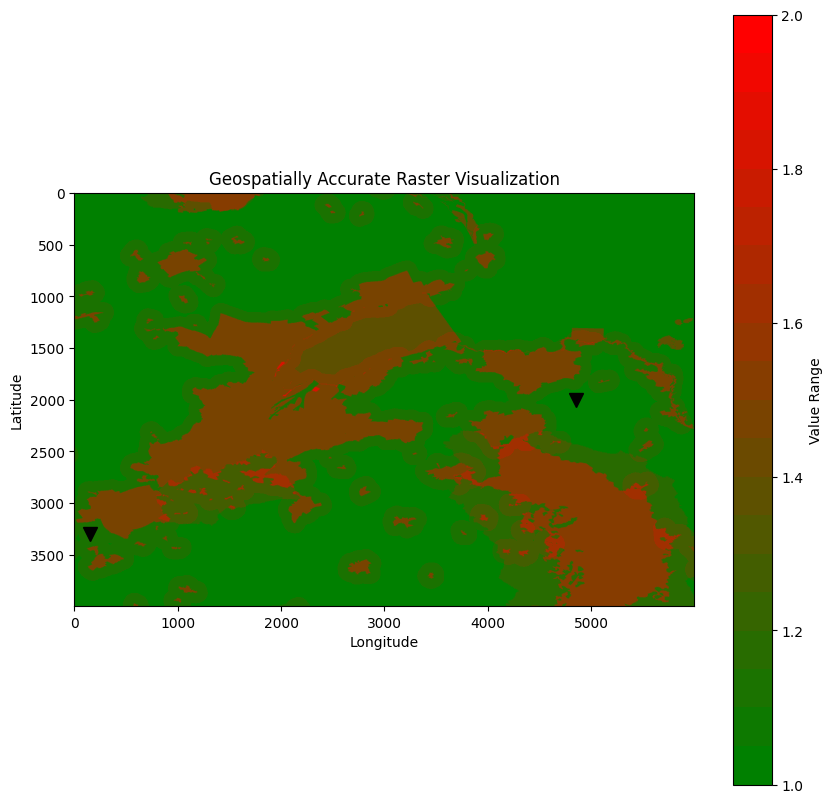

In [30]:
# Manually extract the pixel values for the points of interest.
long_pixels = (20000, 26000)
lat_pixels = (5000, 9000)
point_a_crop = (150, 3300)
point_b_crop = (4850, 2000)

cropped_raster = raster_normalized[lat_pixels[0]:lat_pixels[1], long_pixels[0]:long_pixels[1]]

# Define colors from low to high values
colors = ["green", "red"]  # Start with green, end with red
n_bins = 20  # Increase this for finer color transitions
cmap_name = "custom_green_red"
# Create the colormap
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

fig, ax = plt.subplots(figsize=(10, 10))
# Display the raster
im = ax.imshow(cropped_raster, cmap=cm)

# Add a colorbar to the plot
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Value Range')

# Adding titles and labels (optional)
ax.set_title('Geospatially Accurate Raster Visualization')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add the points of interest.
ax.plot(point_a_crop[0], point_a_crop[1], 'kv', markersize=10)
ax.plot(point_b_crop[0], point_b_crop[1], 'kv', markersize=10)
plt.show()